In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()

In [2]:
th,ph,psi,thd,phd,psid,thdd,phdd,psidd,rho,R = symbols('theta,phi,psi,thetadot,phidot,psidot,thetaddot,phiddot,psiddot,rho,R')

Hemisphere COM

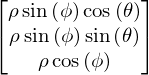

In [3]:
r_dm_O = Matrix([rho*cos(th)*sin(ph),rho*sin(th)*sin(ph), rho*cos(ph)]);r_dm_O

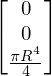

In [4]:
integrate(integrate(integrate(r_dm_O*rho**2*sin(ph),(rho,0,R)),(th,0,2*pi)),(ph,0,pi/2))

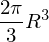

In [5]:
integrate(rho**2*sin(ph),(rho,0,R),(th,0,2*pi),(ph,0,pi/2))

Spherical Gyropendulum

In [6]:
g,t,h,m,l,thdd,phdd,psidd = symbols('g,t,h,m,l,thetaddot,phiddot,psiddot')

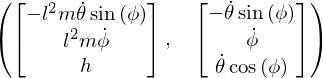

In [7]:
iWs = Matrix([-thd*sin(ph),phd,thd*cos(ph)])
h_O = Matrix([-m*l**2*thd*sin(ph),m*l**2*phd,h]); h_O,iWs

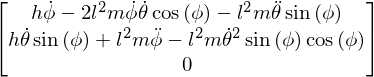

In [8]:
dh_O = difftotalmat(h_O,t,{th:thd,thd:thdd,ph:phd,phd:phdd,psi:psid,psid:psidd}) + h_O[0]*iWs.cross(Matrix([1,0,0])) +h_O[1]*iWs.cross(Matrix([0,1,0])) + h_O[2]*iWs.cross(Matrix([0,0,1]))
dh_O

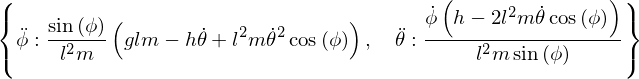

In [9]:
sol1 = solve(dh_O - Matrix([0,m*g*l*sin(ph),0]),(thdd,phdd)); sol1

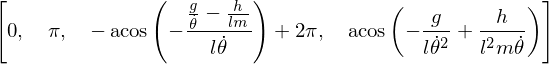

In [10]:
solve(sol1[phdd],ph)

In [11]:
r,z,h = symbols('r,z,h')

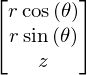

In [12]:
r_dm_G = Matrix([r*cos(th),r*sin(th), z]);r_dm_G

In [13]:
simplify(r_dm_G.transpose()*r_dm_G)

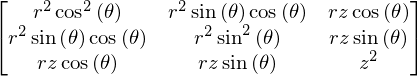

In [14]:
r_dm_G*r_dm_G.transpose()

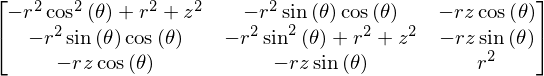

In [15]:
kern1 = ((simplify(r_dm_G.transpose()*r_dm_G))[0]*eye(3) - r_dm_G*r_dm_G.transpose())
kern1

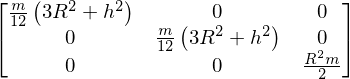

In [18]:
simplify(integrate(integrate(integrate(kern1*r,(r,0,R)),(th,0,2*pi)),(z,-h/2,h/2))*m/pi/R**2/h)

Cross Product as Matrix Operation

In [19]:
a1,a2,a3,b1,b2,b3 = symbols('a_1,a_2,a_3,b_1,b_2,b_3')

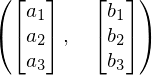

In [20]:
a = Matrix([a1,a2,a3])
b = Matrix([b1,b2,b3])
a,b

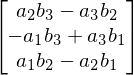

In [21]:
a.cross(b)

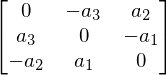

In [22]:
at = Matrix([[0,-a3,a2],[a3,0,-a1],[-a2,a1,0]]); at

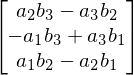

In [23]:
at*b

Spinning Symmetric Rigid Body

In [24]:
I1,I2,I3,O,t,M1 = symbols('I_1,I_2,I_3,Omega,t,M_1')

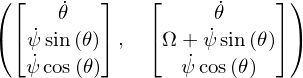

In [25]:
iWc = Matrix([thd,psid*sin(th)+O,psid*cos(th)])
iWb = Matrix([thd,psid*sin(th),psid*cos(th)])
iWb,iWc

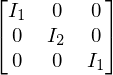

In [26]:
I_G = diag(I1,I2,I1); I_G

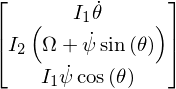

In [27]:
h_G = I_G*iWc; h_G

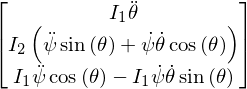

In [28]:
dh_G= difftotalmat(h_G,t,{th:thd,thd:thdd,psi:psid,psid:psidd}); dh_G

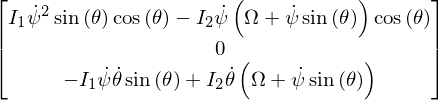

In [29]:
t2 = iWb.cross(h_G); t2

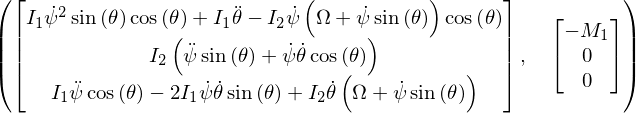

In [30]:
dh_G + t2,Matrix([-M1,0,0])

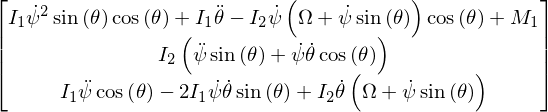

In [31]:
dh_G + t2 - Matrix([-M1,0,0])

Euler's Equations

In [32]:
I1,I2,I3,w1,w2,w3,w1d,w2d,w3d,M1,M2,M3 = symbols('I_1,I_2,I_3,omega_1,omega_2,omega_3,omegadot_1,omegadot_2,omegadot_3,M_1,M_2,M_3')

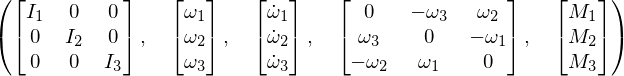

In [33]:
I_G = diag(I1,I2,I3)
w = Matrix([w1,w2,w3])
dw = difftotalmat(w,t,{w1:w1d,w2:w2d,w3:w3d})
wt = Matrix([[0,-w3,w2],[w3,0,-w1],[-w2,w1,0]])
M = Matrix([M1,M2,M3])
(I_G,w,dw,wt,M)